# UE709 Network and Algorithms

## Practical Work 1 - Asif Mammadov

## 3.1 Cities

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
data = pd.read_csv('cities_in_az.csv')
data.head()

,Origin,Destiny,Hours
0,Alat,Baku,1.08
1,Baku,Alat,1.13
2,Alat,Shirvan,0.83
3,Shirvan,Alat,0.80
4,Imishli,Shirvan,1.42


In [2]:
G = nx.from_pandas_edgelist(data, source='Origin', target='Destiny', edge_attr=True)

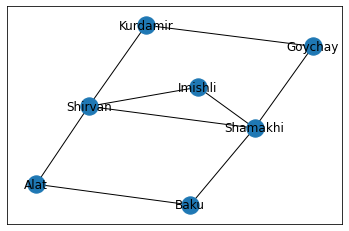

In [3]:
plt.figure()
nx.draw_networkx(G, with_labels=True)
plt.show()

In [4]:

def _dfs_has_path(G, src, dst, visited, parent):
    """
    G : graph
    src : source
    dst : destination
    visited : collect visited nodes
    parent : dictionary that gives parent node of child 
    """
    if src == dst:
        return True
    visited.append(src)
    for neighbor in list(G.neighbors(src)):
        if neighbor not in visited:
            parent[neighbor] = src
            if _dfs_has_path(G, neighbor, dst, visited, parent):
                return True
    return False

def parent_to_path(parent, src, dst):
    path = []
    end = dst
    while True:
        if end == src:
            path.append(end)
            break
        path.append(end)
        end = parent[end]
    return path[::-1]

def dfs_get_path(G, src, dst):
    parent={}
    visited = []
    if not _dfs_has_path(G, src, dst, visited, parent):
        return None
    return parent_to_path(parent, src, dst)

In [5]:
path = dfs_get_path(G, "Baku", "Kurdamir")
print(path)

['Baku', 'Alat', 'Shirvan', 'Imishli', 'Shamakhi', 'Goychay', 'Kurdamir']


In [6]:
def get_edge_attr(G, node1, node2, attr_name):
    return G.edges[node1, node2][attr_name]

def check_time(G, path):
    time = 0
    for i in range(len(path) - 1):
        time += get_edge_attr(G, path[i], path[i+1], "Hours")
    return time

In [7]:
print("%.2f hours" % check_time(G, path))

7.57 hours


## 3.2 Airports

In [8]:
data2 = pd.read_csv('airports.csv')
data2.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,AirTime,Origin,Dest,Distance
0,2008,1,3,4,2003.0,1955,2211.0,2225,116.0,IAD,TPA,810
1,2008,1,3,4,754.0,735,1002.0,1000,113.0,IAD,TPA,810
2,2008,1,3,4,628.0,620,804.0,750,76.0,IND,BWI,515
3,2008,1,3,4,926.0,930,1054.0,1100,78.0,IND,BWI,515
4,2008,1,3,4,1829.0,1755,1959.0,1925,77.0,IND,BWI,515


In [9]:
G2 = nx.from_pandas_edgelist(data2, source='Origin', target='Dest', edge_attr=True)

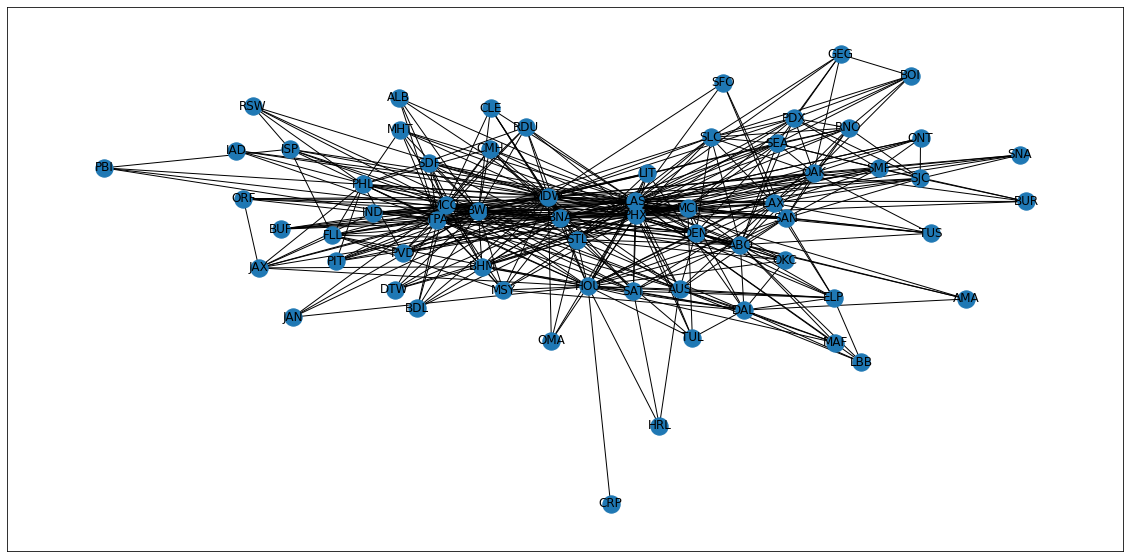

In [10]:
plt.figure(figsize=(20, 10))
nx.draw_networkx(G2, with_labels=True)
plt.show()

In [11]:
visited2 = []
path2 = dfs_get_path(G2, "GEG", "HRL")
print(path2)

['GEG', 'LAS', 'IND', 'BWI', 'ISP', 'FLL', 'JAX', 'BHM', 'MCO', 'JAN', 'HOU', 'LAX', 'ABQ', 'LBB', 'AUS', 'MAF', 'DAL', 'LIT', 'MDW', 'MCI', 'BNA', 'MSY', 'PHX', 'MHT', 'PHL', 'PBI', 'TPA', 'SAT', 'HRL']


In [12]:
def check_distance(G, path):
    dist = 0
    for i in range(len(path) - 1):
        dist += get_edge_attr(G, path[i], path[i+1], "Distance")
    return dist
print("Distance : %.2f km" % check_distance(G2, path2))

Distance : 18049.00 km


In [13]:
def check_airtime(G, path):
    time = 0
    for i in range(len(path) - 1):
        time += get_edge_attr(G, path[i], path[i+1], "AirTime")
    return time
print("Air time : %.2f" % check_airtime(G2, path2))

Air time : 2552.00
